<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/Data-Preprocessing/RFM_CustomerDemographic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_demo = pd.read_excel('/content/RFM Analysis.xlsx', sheet_name='CustomerDemographic')

rfm_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [ ]:
rfm_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [ ]:
rfm_demo['DOB'] = pd.to_datetime(rfm_demo['DOB'])

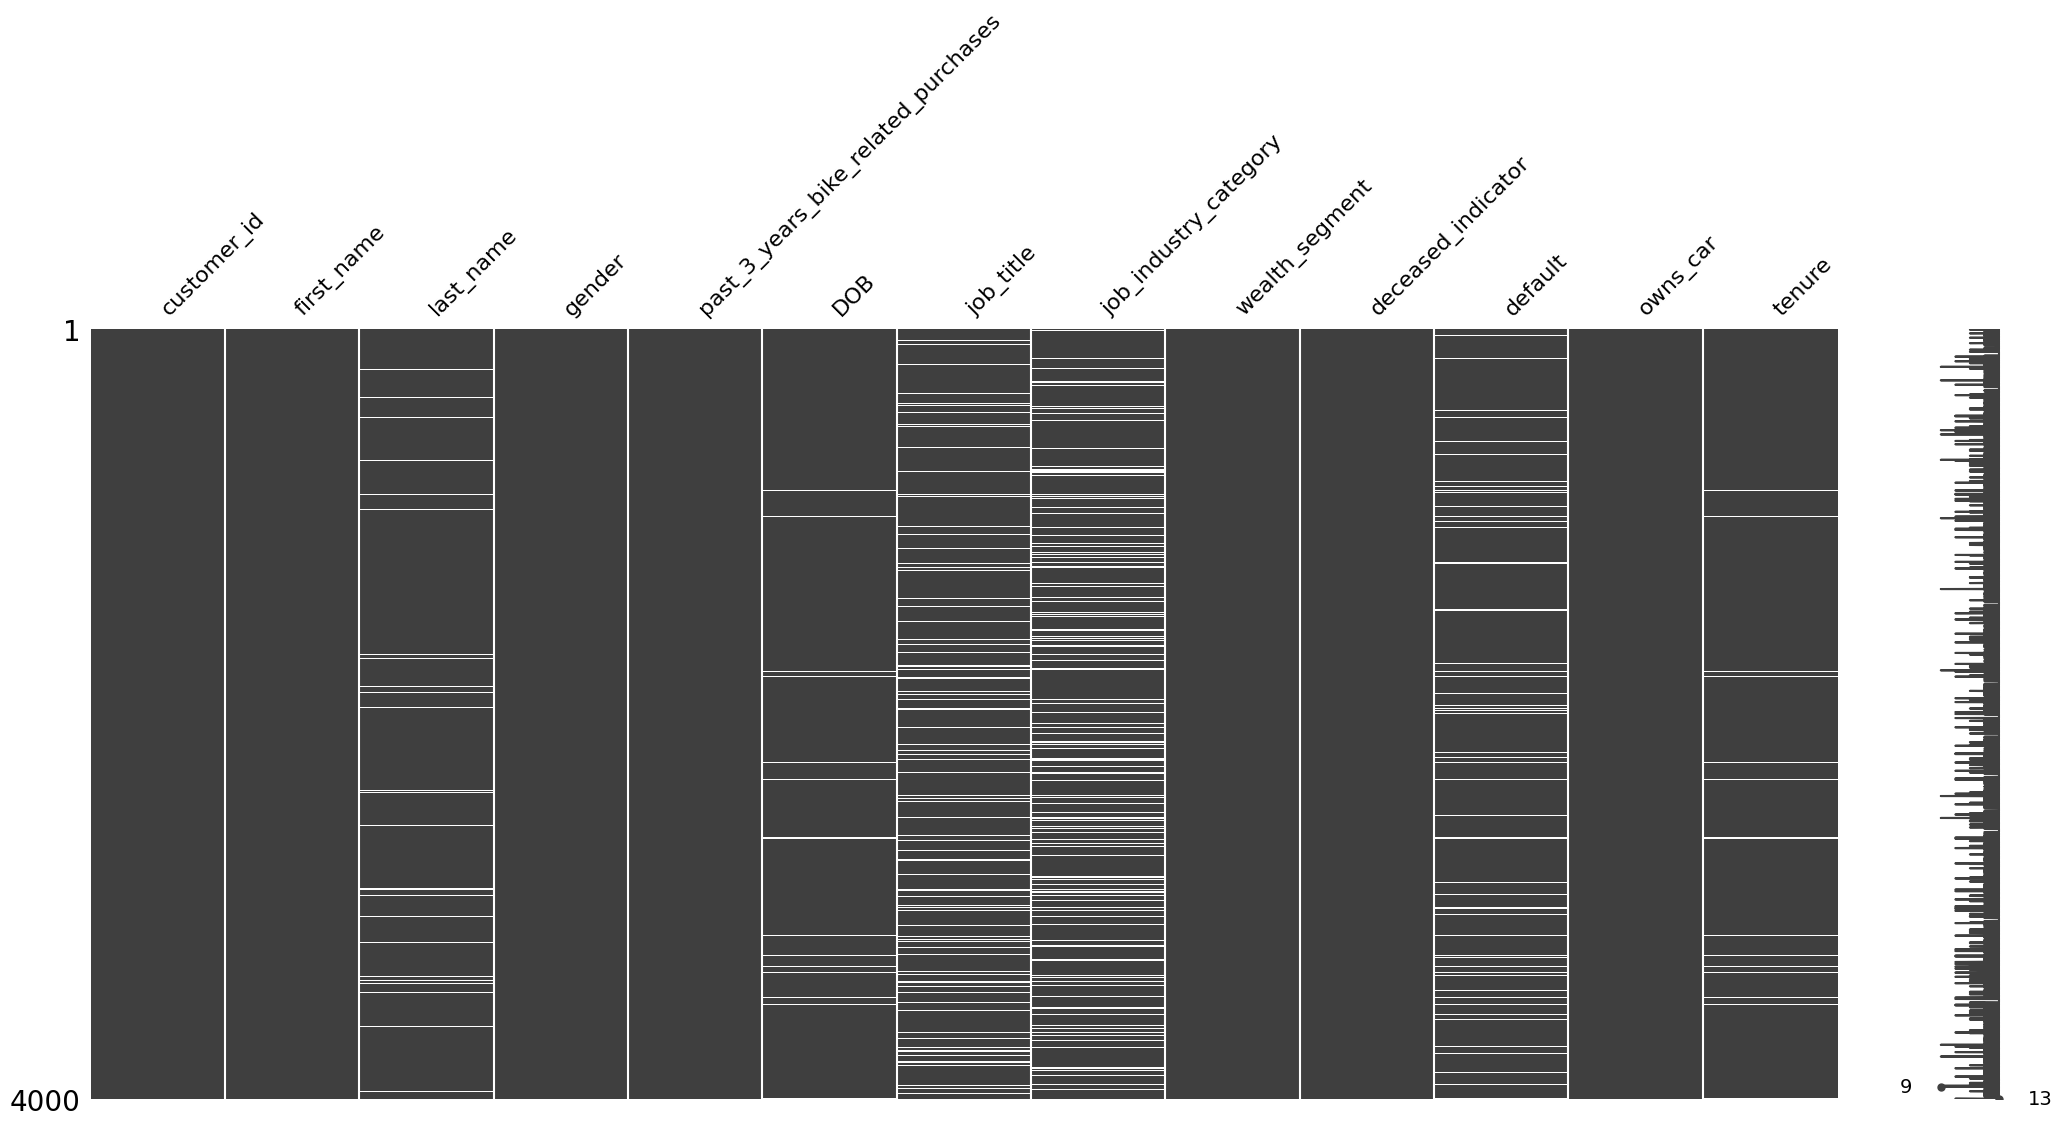

In [ ]:
import missingno as msno

msno.matrix(rfm_demo)
plt.show()

In [ ]:
rfm_demo['gender'].value_counts()

,count
gender,
Female,2037
Male,1872
U,88
F,1
Femal,1
M,1


In [ ]:
rfm_demo['gender'] = rfm_demo['gender'].replace(['F', 'Femal', 'M', 'U'], ['Female', 'Female', 'Male', 'Unknown'])
rfm_demo['gender'].value_counts()

,count
gender,
Female,2039
Male,1873
Unknown,88


In [ ]:
rfm_demo['tenure'].value_counts()   # 2 --> 22

,count
tenure,
7.0,235
5.0,228
11.0,221
10.0,218
16.0,215
8.0,211
18.0,208
12.0,202
9.0,200


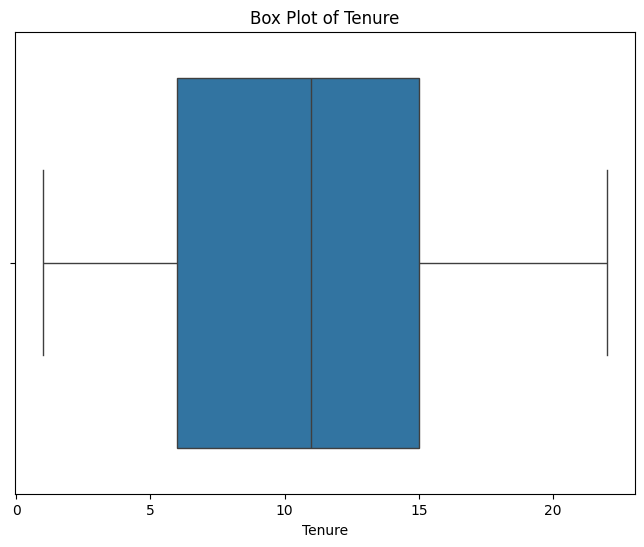

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='tenure', data=rfm_demo)
plt.title('Box Plot of Tenure')
plt.xlabel('Tenure')
plt.show()


In [ ]:
rfm_demo['tenure'].fillna(rfm_demo['tenure'].mean(), inplace=True)

In [ ]:
rfm_demo['owns_car'].value_counts()

,count
owns_car,
Yes,2024
No,1976


In [ ]:
rfm_demo.drop('default', axis=1, inplace=True)

In [ ]:
rfm_demo['deceased_indicator'].value_counts()

,count
deceased_indicator,
N,3998
Y,2


In [ ]:
rfm_demo['wealth_segment'].value_counts()

,count
wealth_segment,
Mass Customer,2000
High Net Worth,1021
Affluent Customer,979


In [ ]:
rfm_demo['job_title'].value_counts()

,count
job_title,
Business Systems Development Analyst,45
Tax Accountant,44
Social Worker,44
Internal Auditor,42
Recruiting Manager,41
...,...
Database Administrator I,4
Health Coach I,3
Health Coach III,3


In [ ]:
rfm_demo['job_title'].str.lower().value_counts()

,count
job_title,
business systems development analyst,45
tax accountant,44
social worker,44
internal auditor,42
recruiting manager,41
...,...
database administrator i,4
health coach i,3
health coach iii,3


In [ ]:
rfm_demo['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [ ]:
rfm_demo['job_title'].isnull().sum()

506

In [ ]:
rfm_demo['job_title'].fillna('Unknown', inplace=True)

In [ ]:
def extract_job_title(rfm_demo):
    """
    Extracts job titles based on keywords and groups them into categories based on job function or field.
    """
    def categorize_job(job_title):
        job_title = job_title.lower()

        # Administrative Roles
        if any(keyword in job_title for keyword in ['secretary', 'administrative', 'assistant', 'legal', 'recruit', 'operator',
                                                    'coordinator', 'manager', 'staff accountant', 'human resources', 'payment']):
            return 'Administrative Roles'

        # Engineering & Technical Roles
        elif any(keyword in job_title for keyword in ['engineer', 'engineering', 'automation specialist', 'analog circuit',
                                                      'mechanical systems', 'gis technical']):
            return 'Engineering & Technical Roles'

        # Management & Leadership Roles
        elif any(keyword in job_title for keyword in ['general manager', 'vp', 'director', 'business systems', 'project manager', 'senior developer',
                                                      'quality engineer', 'cost accountant']):
            return 'Management & Leadership Roles'

        # Marketing & Media
        elif any(keyword in job_title for keyword in ['marketing', 'media manager', 'planner', 'graphic designer', 'social worker', 'community outreach specialist',
                                                      'sales', 'account executive', 'junior executive', 'editor', 'account representative']):
            return 'Marketing & Media'

        # Science & Research
        elif any(keyword in job_title for keyword in ['scientist', 'research', 'biostatistician', 'geologist', 'chemist', 'librarian', 'statistician',
                                                      'environmental', 'chemical engineer']):
            return 'Science & Research'

        # Finance & Accounting
        elif any(keyword in job_title for keyword in ['accountant', 'budget', 'tax accountant', 'financial analyst', 'financial advisor',
                                                      'compensation analyst', 'actuary', 'internal auditor']):
            return 'Finance & Accounting'

        # Education & Teaching
        elif any(keyword in job_title for keyword in ['professor', 'teacher', 'librarian']):
            return 'Education & Teaching'

        # Healthcare & Therapy
        elif any(keyword in job_title for keyword in ['nurse', 'practitioner', 'occupational therapist', 'physical therapy', 'speech pathologist', 'dental hygienist',
                                                      'pharmacist', 'quality control specialist	', 'quality control specialist',
                                                      'health coach', 'safety technician', 'clinical specialist']):
            return 'Healthcare & Therapy'

        # IT & Software Roles
        elif any(keyword in job_title for keyword in ['information systems', 'software', 'developer', 'programmer', 'technical writer', 'help desk', 'technician',
                                                      'coordiator',
                                                      'database', 'systems administrator', 'web', 'computer systems']):
            return 'IT & Software Roles'

        # Catch-all for anything not categorized
        else:
            return job_title

        # Apply categorization to the dataset and return counts
    rfm_demo['categorized_job_title'] = rfm_demo['job_title'].apply(categorize_job)
    return rfm_demo['categorized_job_title'].value_counts()

extract_job_title(rfm_demo)     # 195 --> 10

,count
categorized_job_title,
Administrative Roles,838
Engineering & Technical Roles,532
unknown,506
IT & Software Roles,413
Marketing & Media,342
Management & Leadership Roles,330
Healthcare & Therapy,328
Science & Research,311
Finance & Accounting,300


In [ ]:
rfm_demo.drop('job_title', axis=1, inplace=True)

In [ ]:
rfm_demo['job_industry_category'].value_counts()

,count
job_industry_category,
Manufacturing,799
Financial Services,774
Health,602
Retail,358
Property,267
IT,223
Entertainment,136
Argiculture,113
Telecommunications,72


In [ ]:
rfm_demo['job_industry_category'].isnull().sum()

656

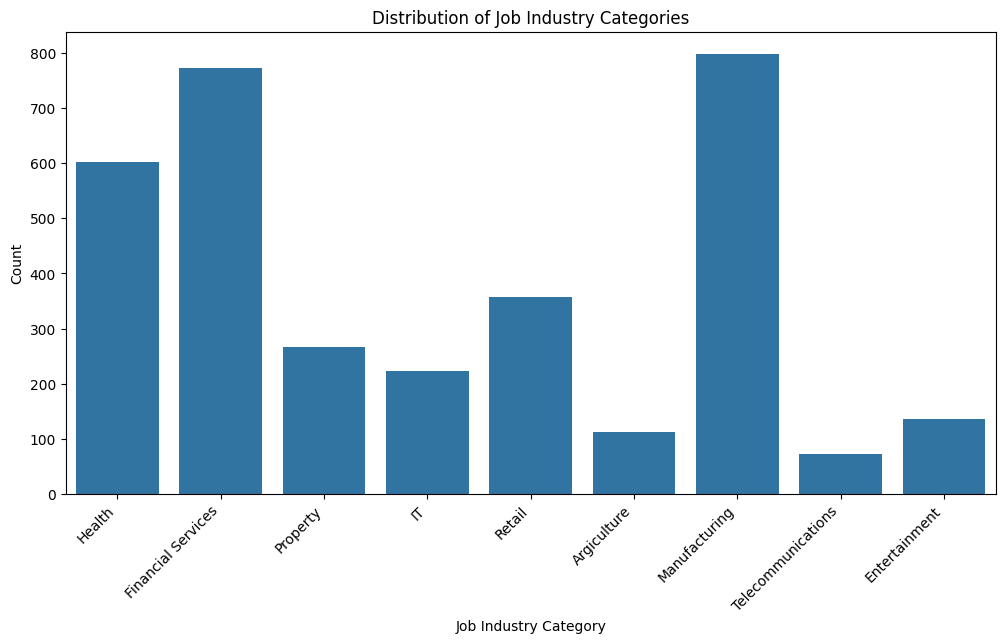

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job_industry_category', data=rfm_demo)
plt.title('Distribution of Job Industry Categories')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Find rows where 'job_industry_category' is NaN
nan_job_industry_rows = rfm_demo[rfm_demo['job_industry_category'].isnull()]

# Print the 'job_industry_category' and 'job_title' for those rows
print(nan_job_industry_rows[['job_industry_category', 'categorized_job_title']])


     job_industry_category          categorized_job_title
4                      NaN              Marketing & Media
7                      NaN           Administrative Roles
15                     NaN           Administrative Roles
16                     NaN              Marketing & Media
17                     NaN           Education & Teaching
...                    ...                            ...
3965                   NaN             Science & Research
3973                   NaN            IT & Software Roles
3975                   NaN           Finance & Accounting
3982                   NaN              Marketing & Media
3999                   NaN  Engineering & Technical Roles

[656 rows x 2 columns]


In [ ]:
rfm_demo['job_industry_category'].fillna('Unknown', inplace=True)

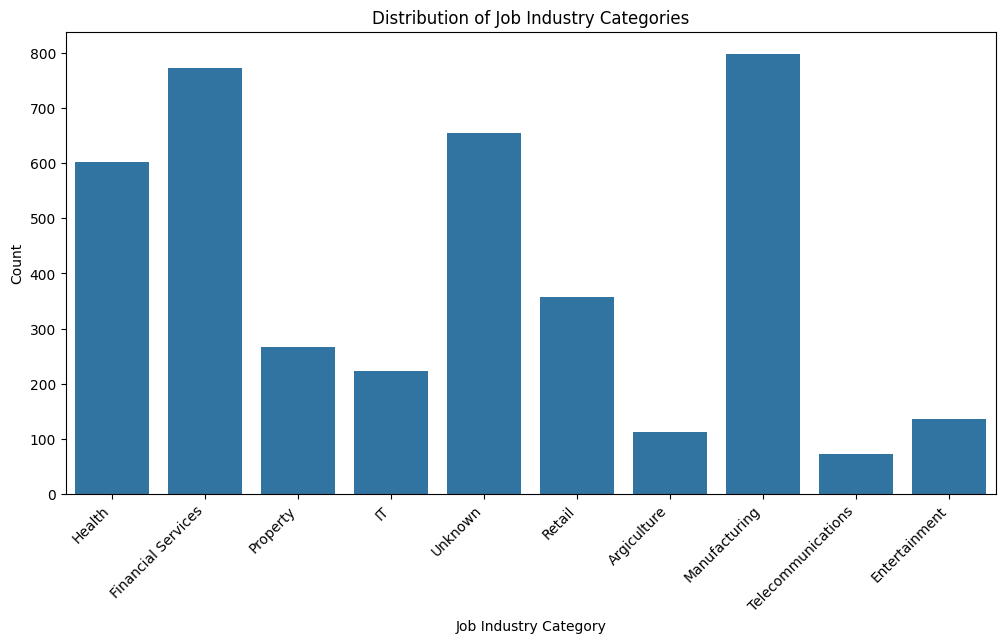

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job_industry_category', data=rfm_demo)
plt.title('Distribution of Job Industry Categories')
plt.xlabel('Job Industry Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
rfm_demo['last_name'].fillna(' ', inplace=True)

In [ ]:
rfm_demo['name'] = rfm_demo['first_name'] + ' ' + rfm_demo['last_name']
rfm_demo.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [ ]:
rfm_demo['age'] = (pd.to_datetime('2017-12-30') - rfm_demo['DOB']).dt.days // 365

rfm_demo


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,categorized_job_title,name,age
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.000000,Administrative Roles,Laraine Medendorp,64.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.000000,Administrative Roles,Eli Bockman,37.0
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.000000,Administrative Roles,Arlin Dearle,63.0
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7.000000,unknown,Talbot,56.0
4,5,Female,56,1977-05-13,Unknown,Affluent Customer,N,Yes,8.000000,Marketing & Media,Sheila-kathryn Calton,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,8,1975-08-09,Health,Mass Customer,N,No,19.000000,Management & Leadership Roles,Rosalia Halgarth,42.0
3996,3997,Female,87,2001-07-13,Manufacturing,High Net Worth,N,Yes,1.000000,Science & Research,Blanch Nisuis,16.0
3997,3998,Unknown,60,NaT,IT,High Net Worth,N,No,10.657041,Administrative Roles,Sarene Woolley,NaN
3998,3999,Male,11,1973-10-24,Manufacturing,Affluent Customer,N,Yes,10.000000,unknown,Patrizius,44.0


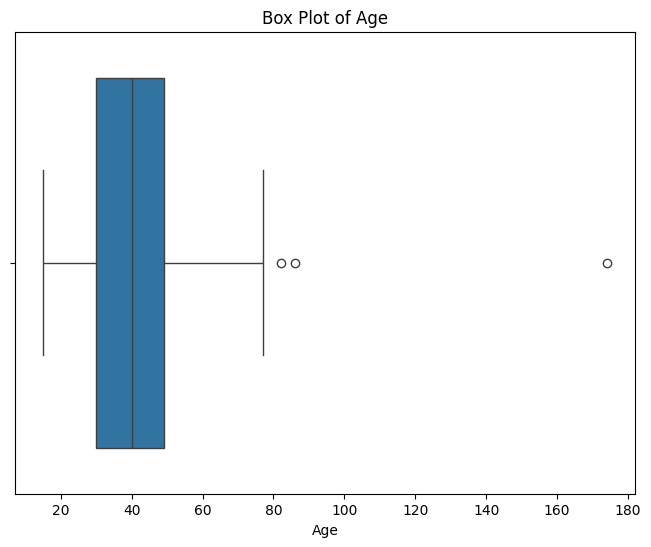

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=rfm_demo)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


In [ ]:
Q1 = rfm_demo['age'].quantile(0.25)
Q3 = rfm_demo['age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

rfm_demo['age'] = np.where(rfm_demo['age'] > upper_bound, rfm_demo['age'].max(), rfm_demo['age'])

rfm_demo['age'].fillna(rfm_demo['age'].mean(), inplace=True)

In [ ]:
rfm_demo.isnull().sum()

,0
customer_id,0
gender,0
past_3_years_bike_related_purchases,0
DOB,87
job_industry_category,0
wealth_segment,0
deceased_indicator,0
owns_car,0
tenure,0
categorized_job_title,0


In [ ]:
rfm_demo.drop('DOB', axis=1, inplace=True)

In [ ]:
rfm_demo

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,categorized_job_title,name,age
0,1,Female,93,Health,Mass Customer,N,Yes,11.000000,Administrative Roles,Laraine Medendorp,64.000000
1,2,Male,81,Financial Services,Mass Customer,N,Yes,16.000000,Administrative Roles,Eli Bockman,37.000000
2,3,Male,61,Property,Mass Customer,N,Yes,15.000000,Administrative Roles,Arlin Dearle,63.000000
3,4,Male,33,IT,Mass Customer,N,No,7.000000,unknown,Talbot,56.000000
4,5,Female,56,Unknown,Affluent Customer,N,Yes,8.000000,Marketing & Media,Sheila-kathryn Calton,40.000000
...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,8,Health,Mass Customer,N,No,19.000000,Management & Leadership Roles,Rosalia Halgarth,42.000000
3996,3997,Female,87,Manufacturing,High Net Worth,N,Yes,1.000000,Science & Research,Blanch Nisuis,16.000000
3997,3998,Unknown,60,IT,High Net Worth,N,No,10.657041,Administrative Roles,Sarene Woolley,40.040123
3998,3999,Male,11,Manufacturing,Affluent Customer,N,Yes,10.000000,unknown,Patrizius,44.000000


In [ ]:
new_column_order = ['customer_id', 'name', 'gender', 'age', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'categorized_job_title']
rfm_demo = rfm_demo[new_column_order]
rfm_demo

,customer_id,name,gender,age,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,categorized_job_title
0,1,Laraine Medendorp,Female,64.000000,Health,Mass Customer,N,Yes,11.000000,Administrative Roles
1,2,Eli Bockman,Male,37.000000,Financial Services,Mass Customer,N,Yes,16.000000,Administrative Roles
2,3,Arlin Dearle,Male,63.000000,Property,Mass Customer,N,Yes,15.000000,Administrative Roles
3,4,Talbot,Male,56.000000,IT,Mass Customer,N,No,7.000000,unknown
4,5,Sheila-kathryn Calton,Female,40.000000,Unknown,Affluent Customer,N,Yes,8.000000,Marketing & Media
...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia Halgarth,Female,42.000000,Health,Mass Customer,N,No,19.000000,Management & Leadership Roles
3996,3997,Blanch Nisuis,Female,16.000000,Manufacturing,High Net Worth,N,Yes,1.000000,Science & Research
3997,3998,Sarene Woolley,Unknown,40.040123,IT,High Net Worth,N,No,10.657041,Administrative Roles
3998,3999,Patrizius,Male,44.000000,Manufacturing,Affluent Customer,N,Yes,10.000000,unknown


In [ ]:
from google.colab import files

rfm_demo.to_csv('RFM_CustomerDemographic.csv', index= False)
files.download('RFM_CustomerDemographic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfm_demo = rfm_demo[rfm_demo.gender != 'Unknown']
rfm_demo['gender'].value_counts()

,count
gender,
Female,2039
Male,1873
